In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from module import (
    numerical_separator,
    standardizer,
    clean,
    enrich,
    correlation_matrix,
    plot_correlation_matrix,
)

In [7]:
#PRETRAITEMENT
 
TrainingData = pd.read_csv('train.csv') #

#clean
TrainingData = clean(TrainingData)

#enrich
TrainingData = enrich(TrainingData) 

#set the target 
target = 'RT'
corr_matrix = correlation_matrix(TrainingData)

# Features Reduction
 The goal being to reduce the number of features. It often aimed to have a training data-number of features ratio of around 100 to 1000 : We have training data containing 3500 molecules, we are therefore aiming to reduce our number of features to 35-350 features max.

### Manually choose correlated feature :
Using our **Correlation Matrix**, we can select in the first column darkly marked pairs (very intercorrelated(red)/inversly-correlated(blue) with RT), and discard them in the rest of the matrix (keeping 2 correlated fearures means keeping 2 features that give similar information: it does not hold many information)


### Principal Component Analysis :
 Reduit automatiquement nb de param 

# Using correlation matrix :
goal : separating the target feature ('RT') and keeping features that are highly correlated with it while reducing redundancy

In [3]:
def features_reduction_using_correlation(correlation_matrix, threshold, dataset):
    """
    Reduce features in a dataset based on a correlation matrix.

    Parameters:
    - correlation_matrix (pd.DataFrame): Correlation matrix of the dataset.
    - threshold (float): Threshold for correlation. Features with correlation above this value will be dropped.
    - dataset (pd.DataFrame): Original dataset.

    Returns:
    - pd.DataFrame: Dataset with reduced features.
    """
    # Create a mask to identify highly correlated features
    upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
    mask = (correlation_matrix.abs() > threshold) & upper_triangle

    # Identify features to drop
    to_drop = set()
    for column in mask.columns:
        correlated_columns = mask.index[mask[column]]
        to_drop.update(set(correlated_columns) - {column})

    # Drop highly correlated features from the dataset
    dataset_filtered = dataset.drop(columns=to_drop)
    
    return dataset_filtered

corr_data = features_reduction_using_correlation(corr_matrix, 0.15, TrainingData)

corr_data.head()

,Compound,SMILES,Lab,ECFP_438,ECFP_724,ECFP_804,ECFP_813,ECFP_820,ECFP_837,ECFP_852,...,ECFP_1011,ECFP_1013,ECFP_1014,ECFP_1017,ECFP_1019,ECFP_1022,ECFP_1023,ECFP_1024,NumAliphaticCarbocycles,NumAliphaticHeterocycles
0,Hydroxytriazolam,OCc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1Cl)=NC2,CFSRE,-0.050775,-0.084819,-0.138635,-0.063372,-0.13429,-0.108872,-0.101944,...,-0.091405,-0.096058,-0.157766,-0.061058,-0.107521,-0.156813,-0.106153,-0.141812,-0.382525,0.822167
1,5-MeO-DIPT,COc1ccc2[nH]cc(CCN(C(C)C)C(C)C)c2c1,Aarhus,-0.050775,-0.084819,-0.138635,-0.063372,-0.13429,-0.108872,-0.101944,...,-0.091405,-0.096058,-0.157766,-0.061058,-0.107521,-0.156813,-0.106153,-0.141812,-0.382525,-0.793546
2,MDMA,CNC(C)Cc1ccc2c(c1)OCO2,Ghent University,-0.050775,-0.084819,-0.138635,-0.063372,-0.13429,-0.108872,-0.101944,...,-0.091405,-0.096058,-0.157766,-0.061058,-0.107521,-0.156813,-0.106153,-0.141812,-0.382525,0.822167
3,Despropionyl N-Benzyl para-Fluoro Norfentanyl,Fc1ccc(NC2CCN(Cc3ccccc3)CC2)cc1,San Francisco OCME,-0.050775,-0.084819,-0.138635,-0.063372,-0.13429,-0.108872,-0.101944,...,-0.091405,-0.096058,-0.157766,-0.061058,-0.107521,-0.156813,-0.106153,-0.141812,-0.382525,0.822167
4,N-Ethylpentylone,CCCC(NCC)C(=O)c1ccc2c(c1)OCO2,Ghent University,-0.050775,-0.084819,-0.138635,-0.063372,-0.13429,-0.108872,-0.101944,...,-0.091405,-0.096058,6.338491,-0.061058,-0.107521,-0.156813,-0.106153,-0.141812,-0.382525,0.822167


### ici se trouve la source de mon dimanche gaché, c fo, ca march pa

from correlation matrix : remove unwanted features

from data : romove corresponding features

In [4]:
 #DOES NOT WORK AT THE MOMENT
 
def numerical_separator(df): 
    """
    Separate the numerical columns for the other in a Dataframe. 
    
    Parameters: 
    - df (pd.dataframe) : Dataframe containing numerical and non numerical columns 
    
    Return: 
    - colonnes_non_numeriques : non numerical columns from the Original Dataframe 
    - colonnes_numeriques : numerical colums form the Original Dataframe
    """
    colonnes_numeriques = df.select_dtypes(include=['number'])
    colonnes_non_numeriques = df.select_dtypes(exclude=['number'])
    return  colonnes_non_numeriques, colonnes_numeriques

def drop_correlated_features(correlation_matrix, threshold, dataset, target='RT'):
    """
    Reduce features in a dataset based on a correlation matrix.

    Parameters:
    - correlation_matrix (pd.DataFrame): Correlation matrix of the dataset.
    - threshold (float): Threshold for correlation. Features with correlation above this value will be dropped.
    - dataset (pd.DataFrame): Original dataset.
    - target (str): Name of the target feature.

    Returns:
    - pd.DataFrame: Dataset with reduced features.
    """
    
    X = correlation_matrix.drop(target, axis=1)  # other features df
    y = correlation_matrix[target]  # target feature df
    non_num_features, num_features = numerical_separator(dataset)  # numerical/non numerical df
    print(non_num_features)
    # DELETE CORRELATED FEATURES
    # Create a mask to identify highly correlated features among X
    upper_triangle = np.triu(np.ones(X.shape), k=1)
    mask_to_drop = (X.abs() > threshold) & upper_triangle

    # Identify features to drop from X
    to_drop = set()
    for column in mask_to_drop.columns:
        correlated_columns = mask_to_drop.index[mask_to_drop[column]]
        to_drop.update(set(correlated_columns) - {column})

    # Drop highly correlated features in the dataset and in X
    non_redundant_X1 = corr_matrix.drop(columns=to_drop)
    non_redundant_DATA1 = dataset.drop(columns=to_drop)


    # DELETE UNCORRELATED TO TARGET
    # Create a mask to identify highly correlated features with the target
    mask_to_keep = (y.abs() > threshold)  # or non red coor matruc
    # Identify features to keep based on mask_target
    features_to_keep = mask_to_keep.index[mask_to_keep]

    # Drop features not in mask_target
    non_redundant_X2 = non_redundant_X1[features_to_keep]
    non_redundant_DATA2 = non_redundant_DATA1[features_to_keep]

    # add non num back
    non_redundant_data = pd.concat([y, non_redundant_DATA2, non_num_features], axis=1)
    non_redundant_data = non_redundant_data.drop_duplicates()

    return non_redundant_data


In [5]:
corr_data_bis = drop_correlated_features(corr_matrix, 0.50, TrainingData, target = target)
corr_data_bis.head()

                                           Compound  \
0                                  Hydroxytriazolam   
1                                        5-MeO-DIPT   
2                                              MDMA   
3     Despropionyl N-Benzyl para-Fluoro Norfentanyl   
4                                  N-Ethylpentylone   
...                                             ...   
3495                                      Triazolam   
3496                                      Alpha-PVP   
3497                        UR-144-M (5-HO-pentyl-)   
3498  Piperazine -1((4-chlorophenyl) phenyl methyl)   
3499                                    Flephedrone   

                                         SMILES  \
0      OCc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1Cl)=NC2   
1           COc1ccc2[nH]cc(CCN(C(C)C)C(C)C)c2c1   
2                        CNC(C)Cc1ccc2c(c1)OCO2   
3               Fc1ccc(NC2CCN(Cc3ccccc3)CC2)cc1   
4                 CCCC(NCC)C(=O)c1ccc2c(c1)OCO2   
...                              

KeyError: "['RT', 'ECFP_46', 'ECFP_70', 'ECFP_262', 'ECFP_334', 'ECFP_550', 'ECFP_888', 'MolecularWeight', 'TotalAtoms', 'CarbonAtoms', 'MolLogP'] not in index"

### visualisation of PCA
we can visualise the new reduced data and its correlation to check our functions :

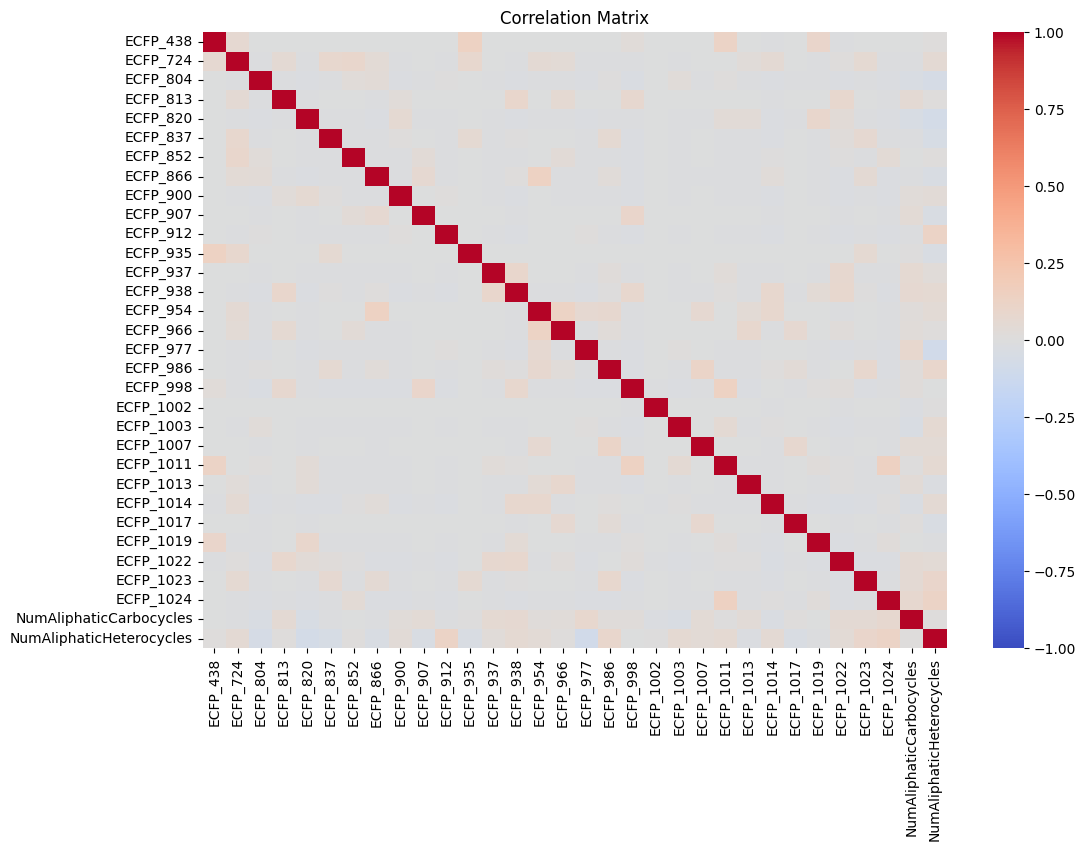

In [18]:
plot_correlation_matrix(corr_data)

# Principal Component Analysis :

### explore variance and find optimal percentage 
Deciding how much of the original data's variability we want to retain in the reduced-dimension representation.

Higher explained variance indicates that the selected principal components capture more of the original data's variability.

#### TO DO 
using ??cross-validation?? to evaluate the performance of your model with different thresholds. TO help  choose a threshold that balances model complexity and predictive performance.

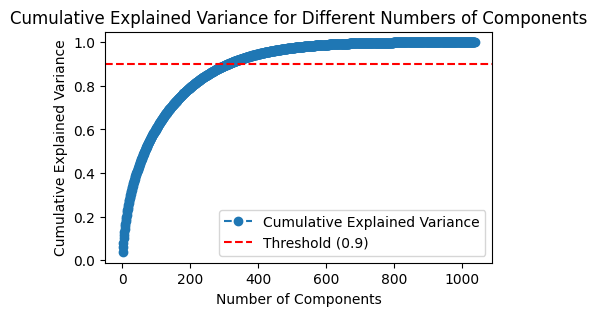

Optimal Percentage: 31.0%
31.0


In [8]:

def choose_pca_percentage(data, target='Corrected_RT', threshold=0.90, step=0.05):
    """
    Choose the optimal percentage of variance to retain for PCA based on cumulative explained variance.

    Parameters:
    - data: pandas DataFrame, the input dataset
    - target: str, the name of the target variable column
    - threshold: float, the desired threshold for cumulative explained variance
    - step: float, the step size for trying different percentages

    Returns:
    - optimal_percentage: float, the chosen percentage of variance to retain
    """
    # Separate numerical and non-numerical columns
    non_numerical_columns, numerical_columns = numerical_separator(data)

    # Standardize numerical features
    standardized_data = standardizer(data)

    # Apply PCA without specifying the number of components
    pca = PCA()
    X_pca = pca.fit_transform(standardized_data[numerical_columns.columns])

    # Explained variance ratio and cumulative explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Visualize the cumulative explained variance
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance for Different Numbers of Components')
    plt.legend()
    plt.show()

    # Choose the optimal percentage based on the threshold
    optimal_percentage = np.argmax(cumulative_explained_variance >= threshold) * step

    print(f'Optimal Percentage: {optimal_percentage}%')
    
    return optimal_percentage


optimal_percentage = choose_pca_percentage(TrainingData, target='Corrected_RT', threshold=0.90, step=0.1)
print(optimal_percentage)

**Slope of the Curve:**
Indicates how quickly the cumulative explained variance is increasing. A steeper slope suggests that adding components contributes significantly to explaining the variance.


**Inflection Point:**
Potential place to choose the number of components.

### PCA function 

In [9]:
def PrincipalComponentAnalysis(data, keeping_percentage, target='Corrected_RT'):
    """
    Perform Principal Component Analysis (PCA) on a given dataset.

    Parameters:
    - data: pandas DataFrame, the input dataset
    - keeping_percentage: float, the desired percentage of variance to retain
    - target: str, the name of the target variable column

    Returns:
    - result: pandas DataFrame, the dataset with reduced features after PCA
    """
    
    # Prepare data
    non_numerical_columns, numerical_columns = numerical_separator(data) # Separate numerical and non-numerical columns
    standardized_data = standardizer(data) # Standardize numerical features

    # Apply PCA with the specified percentage of variance to retain
    pca = PCA(n_components=keeping_percentage)
    X_pca = pca.fit_transform(standardized_data[numerical_columns.columns])

    # Separate features and target variable
    X = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    y = data[target]

    # Concatenate the reduced features with the target variable and non-numerical columns
    result = pd.concat([non_numerical_columns, X, y], axis=1)



    return result


In [16]:
# Specify the desired percentage of variance to retain
keeping_percentage = int(optimal_percentage)
print ( keeping_percentage, '%')

# Apply Principal Component Analysis
PCA_data = PrincipalComponentAnalysis(TrainingData, keeping_percentage, target='RT')

# Display the result
PCA_data.head()

31 %


,Compound,SMILES,Lab,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,RT
0,Hydroxytriazolam,OCc1nnc2n1-c1ccc(Cl)cc1C(c1ccccc1Cl)=NC2,CFSRE,-4.931620,-7.163914,16.969248,-1.163387,-2.190751,-3.015858,-0.332208,...,-1.404811,1.216069,0.579416,-0.868984,0.516226,0.258056,-0.021307,0.227681,2.601284,7.02
1,5-MeO-DIPT,COc1ccc2[nH]cc(CCN(C(C)C)C(C)C)c2c1,Aarhus,-4.782376,-0.555276,-3.161476,-3.041757,2.631885,0.586896,-4.024942,...,-1.384851,1.739473,1.515288,-1.136841,-0.017121,-5.656192,-1.964066,-3.659941,-4.762349,4.45
2,MDMA,CNC(C)Cc1ccc2c(c1)OCO2,Ghent University,-6.672446,-3.087389,-6.733090,-0.987311,0.649799,-3.441656,2.077672,...,-0.944596,-0.193266,0.294991,-0.864353,0.549845,-0.715129,2.261916,1.954327,-1.857029,3.14
3,Despropionyl N-Benzyl para-Fluoro Norfentanyl,Fc1ccc(NC2CCN(Cc3ccccc3)CC2)cc1,San Francisco OCME,-4.235177,2.813945,0.303060,1.762221,1.493680,-0.465739,0.093818,...,3.080366,-3.589162,-2.346400,3.743601,0.428425,0.866259,0.347124,0.342924,-1.154138,5.95
4,N-Ethylpentylone,CCCC(NCC)C(=O)c1ccc2c(c1)OCO2,Ghent University,-5.503653,-2.299795,-7.305024,-1.569218,-3.006679,-3.235085,5.681926,...,0.999841,-0.719461,-2.167760,2.368363,-0.685358,0.490249,-2.103479,-0.461780,0.410099,4.21


### visualisation of PCA

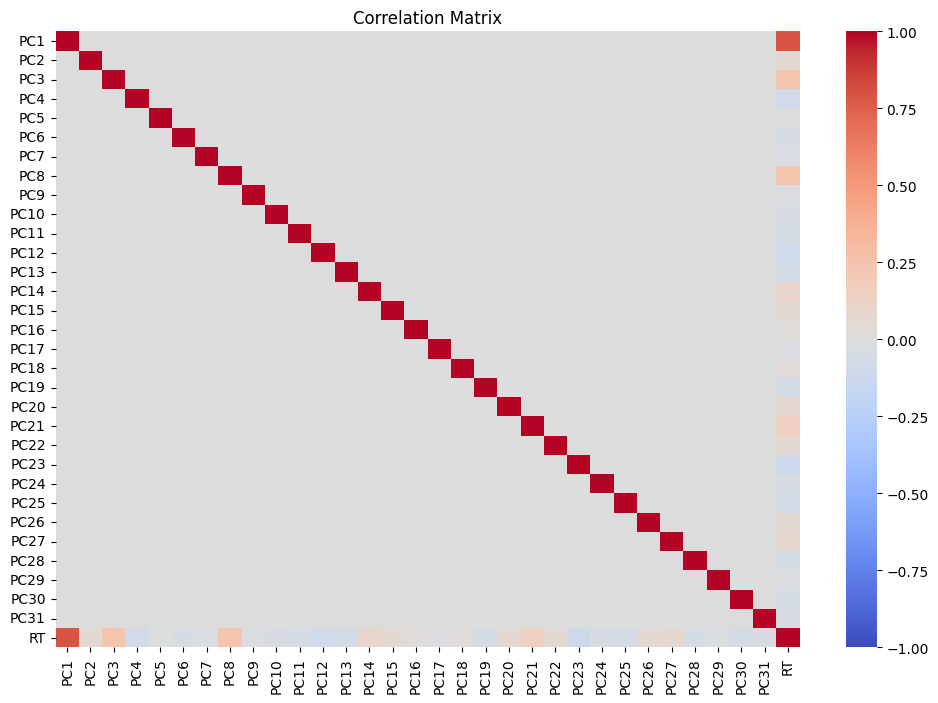

In [17]:
plot_correlation_matrix(PCA_data)

## visualisation of combined reduction techniques 

In [52]:
f_data = features_reduction_using_correlation(TrainingData, 0.15, TrainingData)
f_data = PrincipalComponentAnalysis(f_data, optimal_percentage, target='Corrected_RT')

plot_correlation_matrix(f_data)

TypeError: bad operand type for abs(): 'str'